In [18]:
import numpy as np
import pandas as pd
import glob
from sklearn.model_selection import train_test_split,cross_val_score 
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler 
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import RocCurveDisplay  
import shap

path_positif = "D:\\Magang\\Dataset\\63.01\Positif\\"
path_negatif = "D:\\Magang\\Dataset\\63.01\\Negatif\\"
filenames_p = glob.glob(path_positif + "\*.csv")
filenames_n = glob.glob(path_negatif + "\*.csv")

logfile = pd.DataFrame(columns=['label','filename','path','baseline_S1','baseline_S2','baseline_S3','baseline_S4','baseline_S5','baseline_S6','baseline_S7'
,'baseline_S8','baseline_S9','baseline_S10','max_S1','max_S2','max_S3','max_S4','max_S5','max_S6','max_S7','max_S8','max_S9','max_S10','median_S1','median_S2','median_S3','median_S4','median_S5','median_S6','median_S7','median_S8','median_S9','median_S10'])


In [19]:


class logger:
    def baseline_mean_p(filenames,label,logfile):
    
        for file in filenames:
            path = filenames
            filename = file
            data = pd.read_csv(file)
            for i in range(10):
                data_baseline = np.mean(data[f'S{i + 1}'].iloc[0:200])
                data_max = np.max(data[f'S{i + 1}'].iloc[0:200])
                data_median = np.median(data[f'S{i + 1}'].iloc[0:200])
                if(i==0):
                    baseline_S1 = data_baseline
                    max_S1 = data_max
                    median_S1 = data_median
                elif(i==1):
                    baseline_S2 = data_baseline
                    max_S2 = data_max
                    median_S2 = data_median
                elif(i==2):
                    max_S3 = data_max
                    baseline_S3 = data_baseline
                    median_S3 = data_median
                elif(i==3):
                    max_S4 = data_max
                    baseline_S4 = data_baseline
                    median_S4 = data_median
                elif(i==4):
                    max_S5 = data_max
                    baseline_S5 = data_baseline
                    median_S5 = data_median
                elif(i==5):
                    max_S6 = data_max
                    baseline_S6 = data_baseline
                    median_S6 = data_median
                elif(i==6):
                    max_S7 = data_max
                    baseline_S7 = data_baseline
                    median_S7 = data_median
                elif(i==7):
                    max_S8 = data_max
                    baseline_S8 = data_baseline
                    median_S8 = data_median
                elif(i==8):
                    max_S9 = data_max
                    baseline_S9 = data_baseline
                    median_S9 = data_median
                elif(i==9):
                    max_S10 = data_max
                    baseline_S10 = data_baseline
                    median_S10 = data_median

            log = pd.DataFrame([[label,path,filename,baseline_S1,baseline_S2,baseline_S3,baseline_S4, baseline_S5, baseline_S6, baseline_S7,baseline_S8,baseline_S9,baseline_S10,max_S1,max_S2,max_S3,max_S4,max_S5,max_S6,max_S7,max_S8,max_S9,max_S10,median_S1,median_S2,median_S3,median_S4,median_S5,median_S6,median_S7,median_S8,median_S9,median_S10]], columns=['label','filename','path','baseline_S1','baseline_S2','baseline_S3','baseline_S4','baseline_S5','baseline_S6','baseline_S7','baseline_S8','baseline_S9','baseline_S10','max_S1','max_S2','max_S3','max_S4','max_S5','max_S6','max_S7','max_S8','max_S9','max_S10','median_S1','median_S2','median_S3','median_S4','median_S5','median_S6','median_S7','median_S8','median_S9','median_S10'])
            logfile = logfile.append(log)
        return(logfile)
        
loger = logger    
logfile= loger.baseline_mean_p(filenames_p,1,logfile)
logfile= loger.baseline_mean_p(filenames_n,0,logfile)
#print(logfile.isnull().sum())
#print(logfile.isna().sum())

#Penghilangan kolom filename dan path
logfile = logfile.drop(columns=['filename','path'])
#print(logfile.head())



#Pemisahan Data Train dan Data Tes
y1 = logfile.iloc[:14,0].astype('uint8')
y2=logfile.iloc[17:32,0].astype('uint8')
y1 = y1.append(y2)

X1 = logfile.iloc[:14,1:]
X2 = logfile.iloc[17:32,1:]
X1 = X1.append(X2)

y1test = logfile.iloc[15:17,0].astype('uint8')
y2test = logfile.iloc[33:,0].astype('uint8')
y1test = y1test.append(y2test)

X1test = logfile.iloc[15:17,1:]
X2test = logfile.iloc[33:,1:]
X1test = X1test.append(X2test)

X_train = X1
X_test = X1test

#Data Test

#X_train = (X1-X1.min())/(X1.max()-X1.min())
#X_test = (X1test-X1test.min())/(X1test.max()-X1test.min())

#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, test_size=0.05)


#Transformasi Data
X_train = np.log10(X_train)    
X_test = np.log10(X_test)    
x = np.array(X_train['baseline_S5'])

              precision    recall  f1-score   support

     Negatif       1.00      0.64      0.78        39
     Positif       0.12      1.00      0.22         2

    accuracy                           0.66        41
   macro avg       0.56      0.82      0.50        41
weighted avg       0.96      0.66      0.75        41



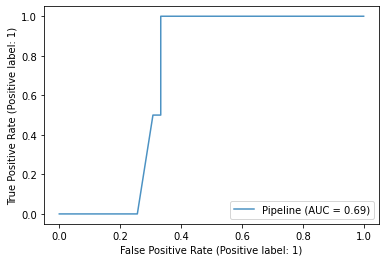

In [20]:

scaler= StandardScaler()
pca = PCA(n_components=2)
models = RandomForestClassifier()

pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("rfc", models)])

#Pemodelan

pipe.fit(X_train,y1)
predictions = pipe.predict(X_test)

#Classification Report
print(classification_report(y1test,predictions,target_names=['Negatif', 'Positif']))

#Kurva ROC
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(pipe, X_test, y1test, ax=ax, alpha=0.8)
plt.show()